# CS 224D Assignment #2
# Part [0]: Warmup: Boolean Logic

To appreciate the power of neural networks to learn complex patterns, it can help to revisit a classic example. It is well-known that a single linear classifier cannot represent the XOR function $x \oplus y$, depicted below*: there is no way to draw a single line that can separate the red and magenta (square) points from the blue and cyan (circle) points.

*Gaussian noise is added to make the point clouds more illustrative; however, you can perform your analysis as if all points were truly boolean variables $(x,y) \in \{0,1\}^2$.

In [1]:
from numpy import *
from matplotlib.pyplot import *

import seaborn as sns
sns.set(context='paper', style='whitegrid')

%matplotlib inline
matplotlib.rcParams['savefig.dpi'] = 100

%load_ext autoreload
%autoreload 2

In [2]:
colors  = list('rbcm')
markers = list('soos')
def show_pts(data):
    for i in range(4):
        idx = (arange(npts) % 4 == i)
        plot(data[0,idx], data[1,idx], linestyle = 'None',
             marker=markers[i],
             color=colors[i], alpha=0.5)
    gca().set_aspect('equal')

def show_pts_1d(data):
    for i in range(4):
        idx = (arange(npts) % 4 == i)
        plot(data[idx], marker=markers[i], linestyle = 'None',
             color=colors[i], alpha=0.5)
    gca().set_aspect(npts/4.0)
    
#### Copy in your implementation from Assignment #1 ####
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # dummy
#### or if the starter code is posted, uncomment the line below ####
# from nn.math import sigmoid

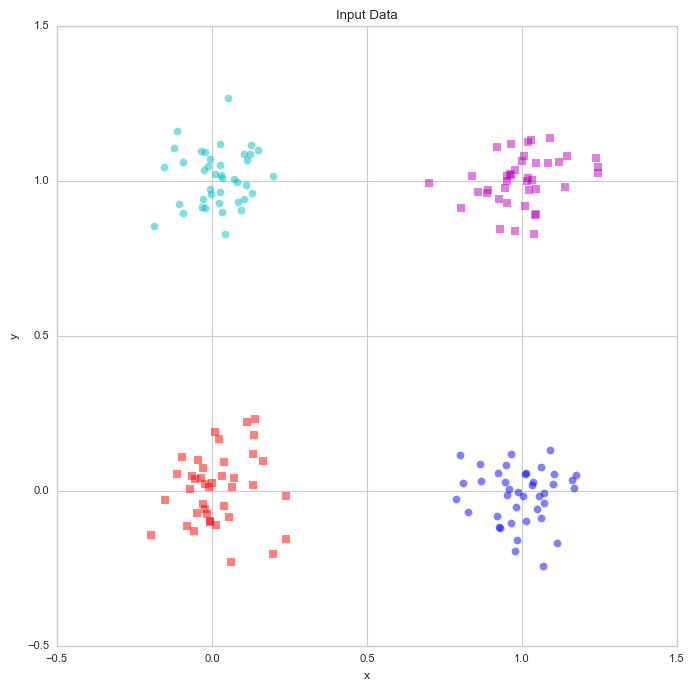

In [3]:
npts = 4 * 40; random.seed(10)
x = random.randn(npts)*0.1 + array([i & 1 for i in range(npts)])
y = random.randn(npts)*0.1 + array([(i & 2) >> 1 for i in range(npts)])
data = vstack([x,y])
figure(figsize=(8,8)); show_pts(data); ylim(-0.5, 1.5); xlim(-0.5, 1.5)
xlabel("x"); ylabel("y"); title("Input Data")

A two-layer neural network, however, can separate this pattern easily. Below, we give you a simple dataset in two dimensions that represents a noisy version of the XOR pattern. Your task is to hand-pick weights for a *very* simple two-layer network, such that it can separate the red/magenta points from the blue/cyan points.

The network uses the following equations, for $W \in \mathbb{R}^{2\times2}$ and $U \in \mathbb{R}^{2}$:

$$ h = \sigma(z\cdot(Wx + b_1)) $$
$$ p = \sigma(z\cdot(Uh + b_2)) $$

where $z$ controls how steep the sigmoid function is; higher values make it approach a step function.

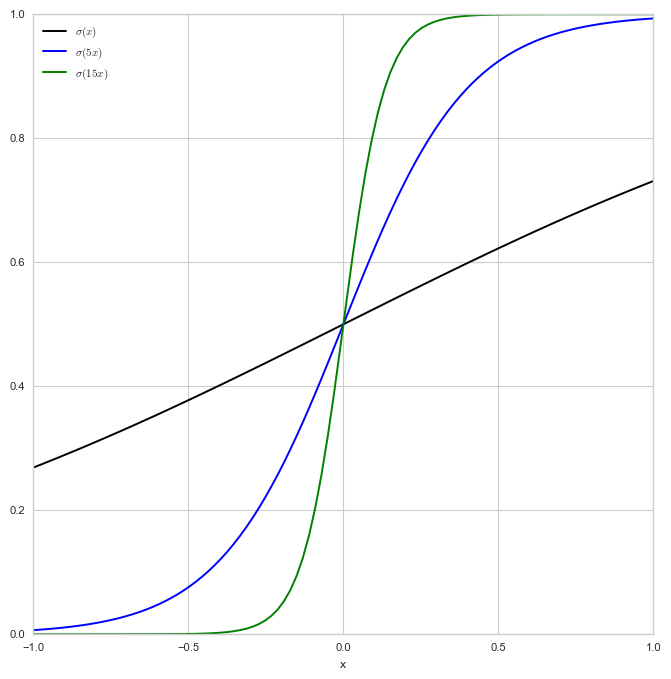

In [4]:
x = linspace(-1, 1, 100); figure(figsize=(8,8))
plot(x, sigmoid(x), 'k', label="$\sigma(x)$"); 
plot(x, sigmoid(5*x), 'b', label="$\sigma(5x)$");
plot(x, sigmoid(15*x), 'g', label="$\sigma(15x)$");
legend(loc='upper left'); xlabel('x');

In the area below, enter values for $W$, $b_1$, $U$, and $b_2$ that will properly place blue and cyan above the dashed line, and red and magenta below.

*Hint:* think about how you can make the data linearly separable after going through the hidden layer. Then find a direction $U$ along which you can separate it!

*Hint:* It may help to think about each "neuron" (i.e. row of $W$ or $U$) separately.

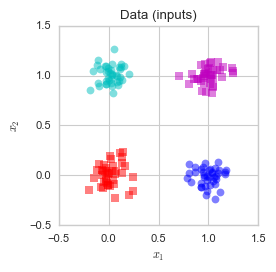

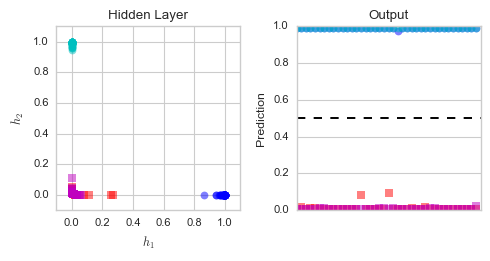

In [5]:
W = zeros((2,2))
b1 = zeros((2,1))
U = zeros(2)
b2 = 0

#### YOUR CODE HERE ####
# XOR Table
#    A B | XOR
#  ----------
#   0 0  | 0
#   1 0  | 1
#   0 1  | 1
#   1 1  | 0

# W.dot(data)

W  = np.array( [ [1, -1],
                 [-1, 1] ] )
U  = np.array( [ 1, 1] )
b1 = np.array([ [-0.5],
                [-0.5] ])
b2 = -0.5

z = 10 # control gate steepness

figure(figsize=(5,5))
subplot(1,2,1)
show_pts(data)
ylim(-0.5, 1.5)
xlim(-0.5, 1.5)
xlabel("$x_1$"); ylabel("$x_2$")
title("Data (inputs)")
tight_layout()
#verification plot
#### END YOUR CODE ####

# Feed-forward computation
h = sigmoid(z*(W.dot(data) + b1))
p = sigmoid(z*(U.dot(h) + b2))

# Plot hidden layer
figure(figsize=(5,5))
subplot(1,2,1); show_pts(h)

title("Hidden Layer"); xlabel("$h_1$"); ylabel("$h_2$")
ylim(-0.1, 1.1); xlim(-0.1, 1.1)
# Plot predictions
subplot(1,2,2); show_pts_1d(p)
title("Output"); ylabel("Prediction"); xticks([])
axhline(0.5, linestyle='--', color='k')
tight_layout()

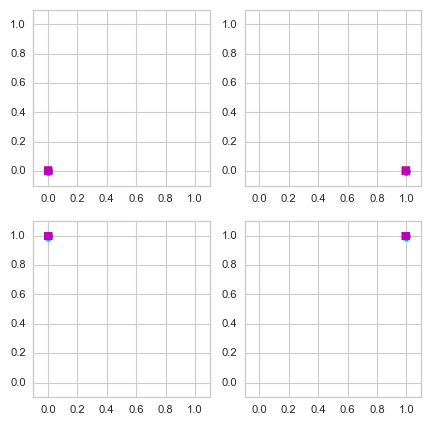

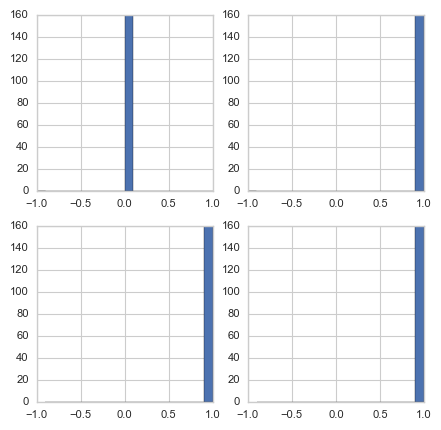

In [6]:
# npts = 4 * 40; random.seed(10)
# x = random.randn(npts)*0.1 + array([i & 1 for i in range(npts)])
# # i & 1 alternates 0, 1
# y = random.randn(npts)*0.1 + array([(i & 2) >> 1 for i in range(npts)])
# # (i & 2) alternates 0, 0, 2, 2, 0, 0, 2, 2 (requires 'bitwise shifting >>' to make it into sequence of 0, 1)

# # Want to create an AND gate, an OR gate and a NOT operator:
# # AND Table
# #    A B | AND
# #  ----------
# #   0 0  | 0
# #   1 0  | 0
# #   0 1  | 0
# #   1 1  | 1

# # OR Table
# #    A B | OR
# #  ----------
# #   0 0  | 0
# #   1 0  | 1
# #   0 1  | 1
# #   1 1  | 1

# # NOT Table
# #    A | NOT
# #  ----------
# #   0  | 1
# #   1  | 0


# Start with 4 sets of numbers:
A_0 = random.randn(npts) * 0.1
B_0 = random.randn(npts) * 0.1

A_1 = random.randn(npts) * 0.1 + 1
B_1 = random.randn(npts) * 0.1 + 1


W = zeros((2,2))
b1 = zeros((2,1))
U = zeros(2)
b2 = 0

W  = np.array( [ [1, 0],
                 [0, 1] ] )
b1 = np.array([ [-0.5],
                [-0.5] ])
U  = np.array( [ 1, 1] )
b2 = -0.5

z = 20 # control gate steepness
figure(figsize=(5,5))
subplot(2,2,1);
data = np.vstack([A_0, B_0])
h = sigmoid(z*(W.dot(data) + b1))
show_pts(h)
ylim(-0.1, 1.1); xlim(-0.1, 1.1)
#
subplot(2,2,2);
data = np.vstack([A_1, B_0])
h = sigmoid(z*(W.dot(data) + b1))
show_pts(h)
ylim(-0.1, 1.1); xlim(-0.1, 1.1)

subplot(2,2,3);
data = np.vstack([A_0, B_1])
h = sigmoid(z*(W.dot(data) + b1))
show_pts(h)
ylim(-0.1, 1.1); xlim(-0.1, 1.1)

subplot(2,2,4);
data = np.vstack([A_1, B_1])
h = sigmoid(z*(W.dot(data) + b1))
show_pts(h)
ylim(-0.1, 1.1); xlim(-0.1, 1.1)

figure(figsize=(5,5))
subplot(2,2,1);
data = np.vstack([A_0, B_0])
h = sigmoid(z*(W.dot(data) + b1))
p = sigmoid(z*(U.dot(h) + b2))
hist(p, bins=20, range=[-1,1])

subplot(2,2,2);
data = np.vstack([A_1, B_0])
h = sigmoid(z*(W.dot(data) + b1))
p = sigmoid(z*(U.dot(h) + b2))
hist(p, bins=20, range=[-1,1])

subplot(2,2,3);
data = np.vstack([A_0, B_1])
h = sigmoid(z*(W.dot(data) + b1))
p = sigmoid(z*(U.dot(h) + b2))
hist(p, bins=20, range=[-1,1])

subplot(2,2,4);
data = np.vstack([A_1, B_1])
h = sigmoid(z*(W.dot(data) + b1))
p = sigmoid(z*(U.dot(h) + b2))
hist(p, bins=20, range=[-1,1]);


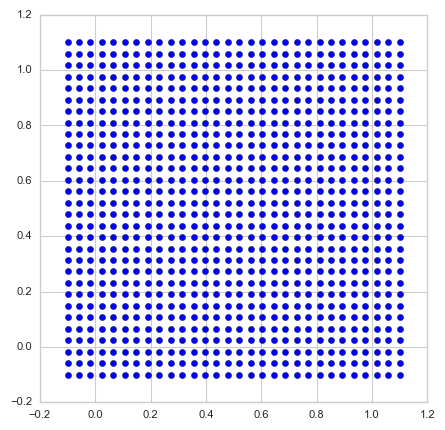

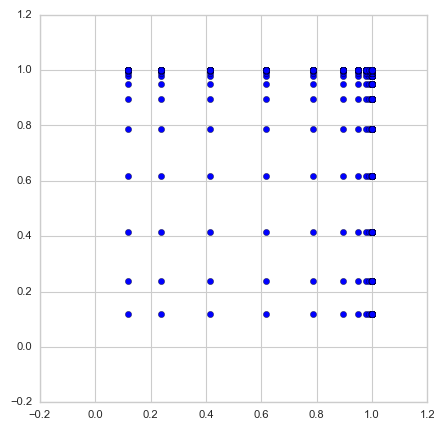

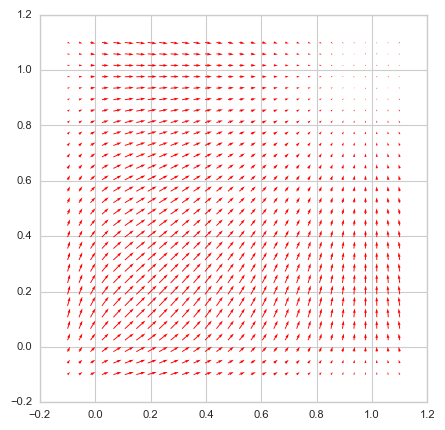

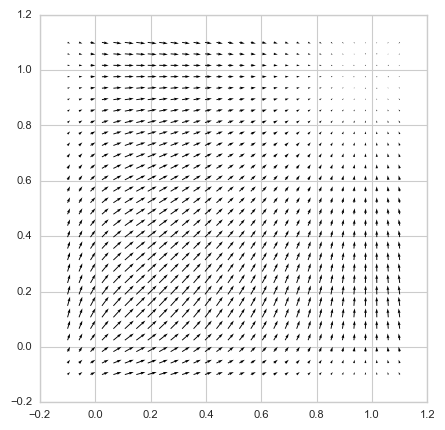

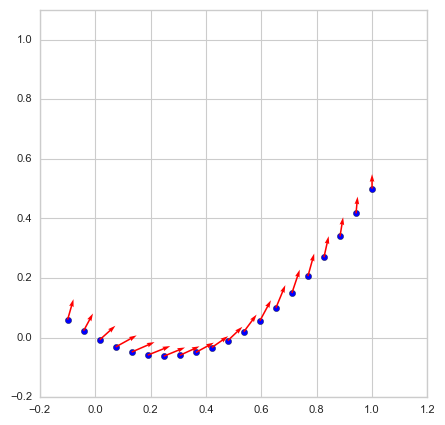

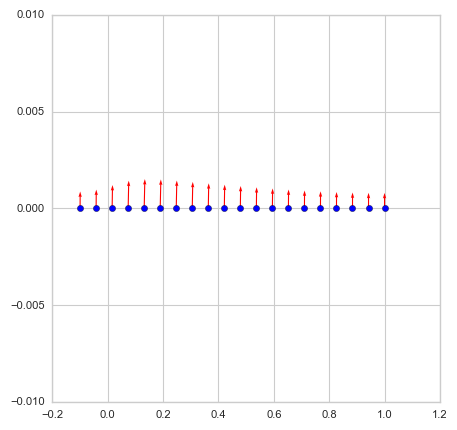

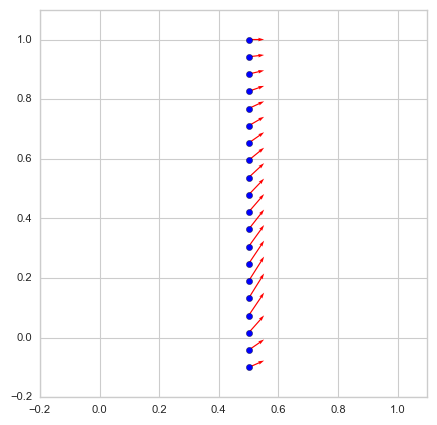

In [7]:
#plots showing the vector flow
x_coor = np.linspace(-0.1,1.1,30)
y_coor = np.linspace(-0.1,1.1,30)
xy_array = np.dstack(np.meshgrid(x_coor, y_coor)).reshape(-1, 2)
xy_array = xy_array.T
#test = [(x,y) for x in x_coor for y in y_coor]
figure(figsize=(5,5))
scatter(xy_array[0], xy_array[1])
ylim(-0.2, 1.2); xlim(-0.2, 1.2)


W = zeros((2,2))
b1 = zeros((2,1))
U = zeros(2)
b2 = 0

#### YOUR CODE HERE ####
# XOR Table
#    A B | XOR
#  ----------
#   0 0  | 0
#   1 0  | 1
#   0 1  | 1
#   1 1  | 0

# W.dot(data)

W  = np.array( [ [1, 0],
                 [0, 1] ] )
U  = np.array( [ 0, 0] )
b1 = np.array([ [0],
                [0] ])
b2 = 0

z = 20 # control gate steepness

#### END YOUR CODE ####

# Feed-forward computation
h = sigmoid(z*(W.dot(xy_array) + b1))
p = sigmoid(z*(U.dot(h) + b2))

# Plot hidden layer
figure(figsize=(5,5))
scatter(h[0], h[1])#show_pts(h)
ylim(-0.2, 1.2); xlim(-0.2, 1.2)

figure(figsize=(5,5))
diff = h - xy_array
X = xy_array[0]
Y = xy_array[1]
# diff = diff / np.max(np.abs(diff),axis=0)
UN = diff[0]
VN = diff[1]
quiver(X,Y, UN, VN, color='red', headlength=5, angles='xy')
show()

figure(figsize=(5,5))
Q = quiver(X, Y, UN, VN, units='inches', angles='xy')
show()


#
x = np.linspace(-0.1,1,20)
y = x ** 2 - 0.5 * x

points = np.vstack([x,y])
figure(figsize=(5,5))
scatter(points[0], points[1])
h_line = sigmoid(z*(W.dot(points) + b1))
diff_line = h_line - points
X = points[0]
Y = points[1]
UN = diff_line[0]
VN = diff_line[1]
quiver(X,Y, UN, VN, color='red', angles='xy', width=0.004)
ylim(-0.2,1.1)
show()

x = np.linspace(-0.1,1,20)
y = np.linspace(0,0,20)
points = np.vstack([x,y])
figure(figsize=(5,5))
h_line = sigmoid(z*(W.dot(points) + b1))
diff_line = h_line - points
X = points[0]
Y = points[1]
UN = diff_line[0]
VN = diff_line[1]
quiver(X,Y, UN, VN, color='red', units='x', angles='xy', width=0.004)
scatter(points[0], points[1])
ylim(-0.01,0.01)
show()


figure(figsize=(5,5))
x = np.linspace(0.5,0.5,20)
y = np.linspace(-0.1,1,20)
points = np.vstack([x,y])
h_line = sigmoid(z*(W.dot(points) + b1))
diff_line = h_line - points
X = points[0]
Y = points[1]
UN = diff_line[0]
VN = diff_line[1]
quiver(X,Y, UN, VN, color='red', units='x', angles='xy', width=0.004)
scatter(points[0], points[1])
xlim(-0.2,1.1)
ylim(-0.2,1.1)
show()

(-0.2, 1.1)

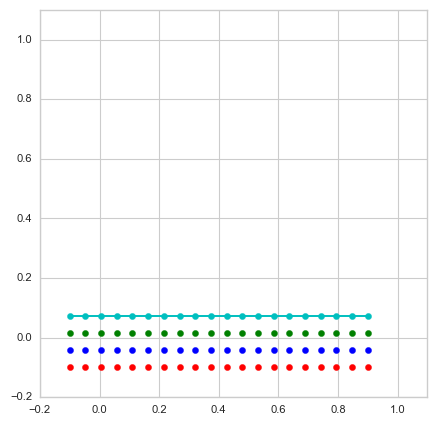

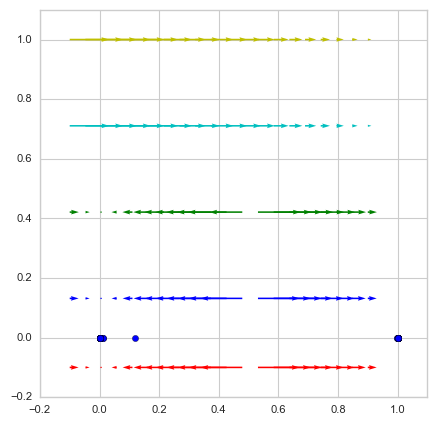

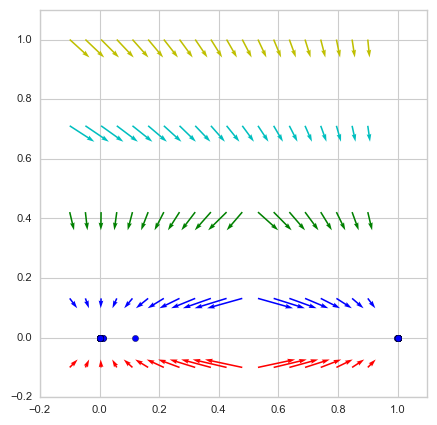

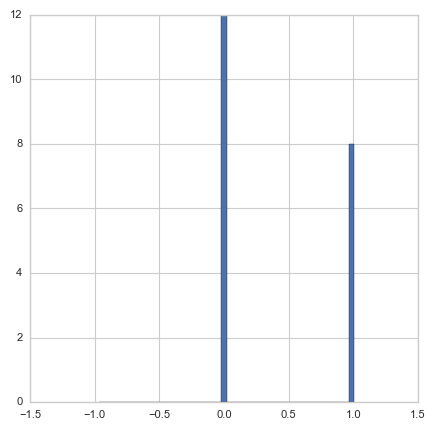

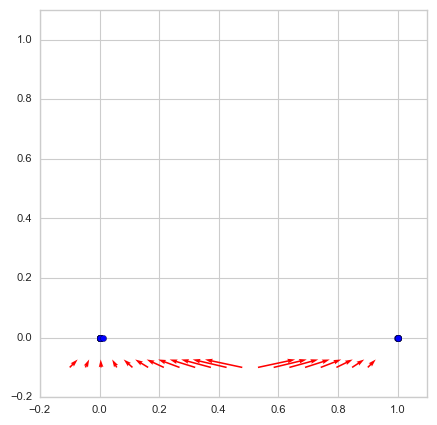

In [8]:
#notice that moving z (slowly will display the warping)
#
#
#
x = np.hstack([np.linspace(x/19-0.1,x/19-0.1,20) for x in range(20)])
y = np.hstack([np.linspace(-0.1,1,20) for x in range(20)])

#careful, U,W, b1, b2 can change
W  = np.array( [ [1, 0],
                 [0, 1] ] )
b1 = np.array([ [-0.5],
                [-0.5] ])
U  = np.array( [ 1, 1] )
b2 = -0.5
z = 30

points = np.vstack([x,y])

figure(figsize=(5,5))
scatter(points[0,0::20],points[1,0::20], color='r');
scatter(points[0,1::20],points[1,1::20], color='b');
scatter(points[0,2::20],points[1,2::20], color='g');
scatter(points[0,3::20],points[1,3::20], color='c');
plot(points[0,3::20],points[1,3::20], color='c');
xlim(-0.2,1.1)
ylim(-0.2,1.1)

## ALL values (projected flow)
h_all = sigmoid(z * (W.dot(points) + b1))
p_all = sigmoid(z*(U.dot(h_all) + b2))
origin_all = np.linspace(0,0,len(p_all))
p_0_all = np.vstack([p_all, origin_all])

figure(figsize=(5,5))

case = 0
diff_line = p_0_all - points
X = points[0,case::20]
Y = points[1,case::20]
UN = diff_line[0,case::20]
VN = np.zeros_like(UN)#diff_line[1,case::20]
quiver(X,Y, UN, VN, color='r', angles='xy', width=0.004)
scatter(p_0_all[0,case::20], p_0_all[1,case::20])

case = 4
X = points[0,case::20]
Y = points[1,case::20]
UN = diff_line[0,case::20]
VN = np.zeros_like(UN)#VN = diff_line[1,case::20]
quiver(X,Y, UN, VN, color='b', angles='xy', width=0.004)
scatter(p_0_all[0,case::20], p_0_all[1,case::20])

case = 9
X = points[0,case::20]
Y = points[1,case::20]
UN = diff_line[0,case::20]
VN = np.zeros_like(UN)#VN = diff_line[1,case::20]
quiver(X,Y, UN, VN, color='g', angles='xy', width=0.004)
scatter(p_0_all[0,case::20], p_0_all[1,case::20])

case = 14
X = points[0,case::20]
Y = points[1,case::20]
UN = diff_line[0,case::20]
VN = np.zeros_like(UN)#VN = diff_line[1,case::20]
quiver(X,Y, UN, VN, color='c', angles='xy', width=0.004)
scatter(p_0_all[0,case::20], p_0_all[1,case::20])

case = 19
X = points[0,case::20]
Y = points[1,case::20]
UN = diff_line[0,case::20]
VN = np.zeros_like(UN)#VN = diff_line[1,case::20]
quiver(X,Y, UN, VN, color='y', angles='xy', width=0.004)
scatter(p_0_all[0,case::20], p_0_all[1,case::20])

xlim(-0.2,1.1)
ylim(-0.2,1.1);



## ALL values (flow)
h_all = sigmoid(z * (W.dot(points) + b1))
p_all = sigmoid(z*(U.dot(h_all) + b2))
origin_all = np.linspace(0,0,len(p_all))
p_0_all = np.vstack([p_all, origin_all])

figure(figsize=(5,5))

case = 0
diff_line = p_0_all - points
X = points[0,case::20]
Y = points[1,case::20]
UN = diff_line[0,case::20]
VN = diff_line[1,case::20]
quiver(X,Y, UN, VN, color='r', angles='xy', width=0.004)
scatter(p_0_all[0,case::20], p_0_all[1,case::20])

case = 4
X = points[0,case::20]
Y = points[1,case::20]
UN = diff_line[0,case::20]
VN = VN = diff_line[1,case::20]
quiver(X,Y, UN, VN, color='b', angles='xy', width=0.004)
scatter(p_0_all[0,case::20], p_0_all[1,case::20])

case = 9
X = points[0,case::20]
Y = points[1,case::20]
UN = diff_line[0,case::20]
VN = VN = diff_line[1,case::20]
quiver(X,Y, UN, VN, color='g', angles='xy', width=0.004)
scatter(p_0_all[0,case::20], p_0_all[1,case::20])

case = 14
X = points[0,case::20]
Y = points[1,case::20]
UN = diff_line[0,case::20]
VN = VN = diff_line[1,case::20]
quiver(X,Y, UN, VN, color='c', angles='xy', width=0.004)
scatter(p_0_all[0,case::20], p_0_all[1,case::20])

case = 19
X = points[0,case::20]
Y = points[1,case::20]
UN = diff_line[0,case::20]
VN = VN = diff_line[1,case::20]
quiver(X,Y, UN, VN, color='y', angles='xy', width=0.004)
scatter(p_0_all[0,case::20], p_0_all[1,case::20])

xlim(-0.2,1.1)
ylim(-0.2,1.1);


#Single case
XY = points[:,::20]
h = sigmoid(z*(W.dot(XY) + b1))
p = sigmoid(z*(U.dot(h) + b2))

origin = np.linspace(0,0.,20)
p_0 = np.vstack([p,origin])

figure(figsize=(5,5))
hist(p, bins=51, range=[-1.01,1.01])

figure(figsize=(5,5))
diff_line = p_0 - XY
X = XY[0]
Y = XY[1]
UN = diff_line[0]
VN = diff_line[1]
quiver(X, Y, UN, VN, color='r', angles='xy', width=0.004)
scatter(p_0[0,:], p_0[1,:])
xlim(-0.2,1.1)
ylim(-0.2,1.1)



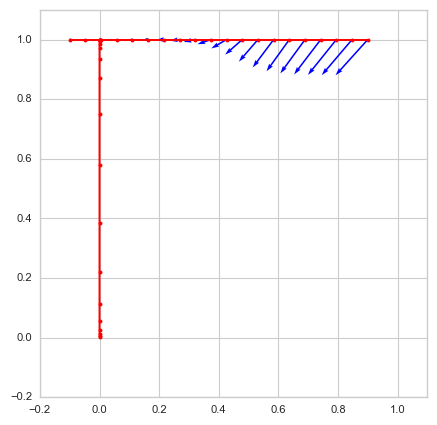

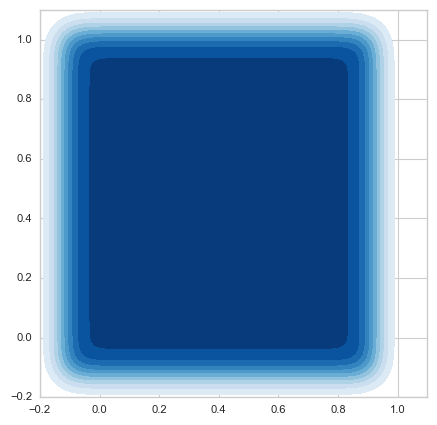

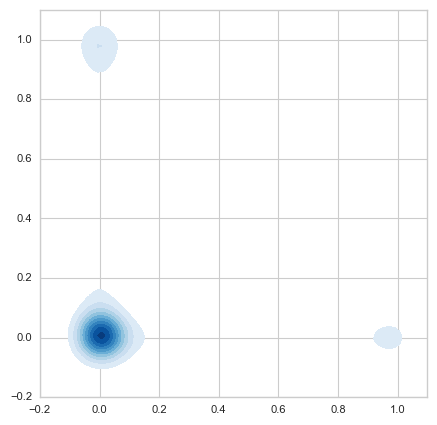

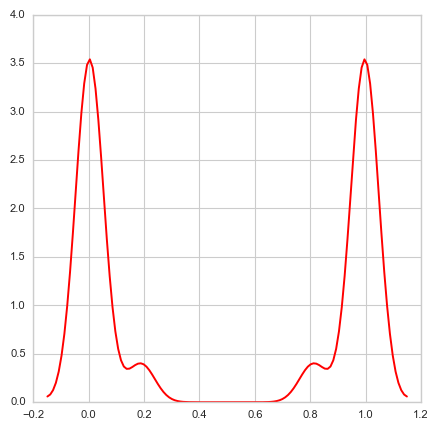

In [9]:
#notice that moving z (slowly will display the warping)
#
#
#
x = np.hstack([np.linspace(x/19-0.1,x/19-0.1,20) for x in range(20)])
y = np.hstack([np.linspace(-0.1,1,20) for x in range(20)])

#careful, U,W, b1, b2 can change
W  = np.array( [ [1, -1],
                 [-1, 1] ] )
U  = np.array( [ 1, 1] )
b1 = np.array([ [-0.5],
                [-0.5] ])
b2 = -0.5

z = 15 # control gate steepness

points = np.vstack([x,y])

## ALL values (projected flow)
h_all = sigmoid(z * (W.dot(points) + b1))
p_all = sigmoid(z * (U.dot(h_all) + b2))
origin_all = np.linspace(0,0,len(p_all))
p_0_all = np.vstack([p_all, origin_all])

figure(figsize=(5,5))

case = 19
diff_line = h_all - points
X = points[0,case::20]
Y = points[1,case::20]
UN = diff_line[0,case::20]
VN = diff_line[1,case::20]
quiver(X,Y, UN, VN, color='b', angles='xy', width=0.004)
plot(points[0,case::20], points[1,case::20], color='r', marker='.')
plot(h_all[0,case::20], h_all[1,case::20], color='r', marker='.')
xlim(-0.2,1.1)
ylim(-0.2,1.1);


figure(figsize=(5,5))
sns.kdeplot(points[0], points[1], cmap="Blues", shade=True, shade_lowest=False, bw=0.05)
#sns.kdeplot(points[0], points[1], cmap="Blues", shade=True, shade_lowest=False)
xlim(-0.2,1.1)
ylim(-0.2,1.1);

figure(figsize=(5,5))
sns.kdeplot(h_all[0,:], h_all[1,:], cmap="Blues", shade=True, shade_lowest=False, bw=0.05)
xlim(-0.2,1.1)
ylim(-0.2,1.1);

figure(figsize=(5,5))
#sns.distplot(p_all[::20], hist=False, rug=True, color="r");
sns.kdeplot(p_all[::20], color="r", bw=0.05);